In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Baca file csv
data = pd.read_csv("TotalQuestions.csv")
data.head(10)

,Month,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,...,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
0,2008-09-01,755,1639,0,474,0,286,0,503,0,...,65,320,328,50,130,11,6,537,634,1129
1,2008-11-01,734,1729,0,499,0,157,0,413,0,...,51,258,327,106,97,11,1,448,580,954
2,2008-12-01,630,1594,0,476,0,159,0,424,0,...,51,188,309,123,133,13,1,437,625,825
3,2009-01-01,848,2374,0,628,1,205,0,585,0,...,47,318,414,143,146,19,8,631,790,1147
4,2009-02-01,841,2597,0,757,1,286,0,668,0,...,75,331,480,209,163,27,8,630,945,1202
5,2009-03-01,1046,3155,0,895,1,329,0,658,0,...,85,430,524,291,137,23,4,764,1007,1429
6,2009-04-01,1016,3303,0,957,0,358,0,750,0,...,72,455,524,357,161,32,12,770,1047,1529
7,2009-05-01,1214,3549,0,1170,2,401,0,844,0,...,85,481,675,500,196,42,2,995,1429,1813
8,2009-06-01,1250,3880,1,1571,0,431,0,925,0,...,76,498,760,490,246,43,5,1042,1552,2110
9,2009-07-01,1465,4402,0,2014,0,499,0,1085,0,...,106,538,982,678,256,39,50,1157,1752,2253


In [39]:
# Menghapus kolom yang tidak relevan
data.drop(['Month'], axis=1, inplace=True)

In [40]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head(10)


,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,Scala,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
0,0.015588,0.003099,0.000000,0.000000,0.000000,0.054073,0.0,0.012257,0.0,0.002246,0.019912,0.030275,0.001473,0.002619,0.104575,0.000000,0.000811,0.003455,0.002298,0.014432
1,0.012969,0.009296,0.000000,0.001410,0.000000,0.008182,0.0,0.000000,0.0,0.001497,0.004425,0.016055,0.001395,0.013900,0.068627,0.000000,0.000000,0.000380,0.000000,0.006124
2,0.000000,0.000000,0.000000,0.000113,0.000000,0.008894,0.0,0.001498,0.0,0.000000,0.004425,0.000000,0.000000,0.017325,0.107843,0.001329,0.000000,0.000000,0.001915,0.000000
3,0.027185,0.053708,0.000000,0.008686,0.000194,0.025258,0.0,0.023424,0.0,0.006737,0.000000,0.029817,0.008138,0.021354,0.122004,0.005316,0.001135,0.006703,0.008937,0.015287
4,0.026313,0.069063,0.000000,0.015963,0.000194,0.054073,0.0,0.034727,0.0,0.006737,0.030973,0.032798,0.013253,0.034649,0.140523,0.010631,0.001135,0.006669,0.015534,0.017898
5,0.051877,0.107485,0.000000,0.023746,0.000194,0.069370,0.0,0.033365,0.0,0.010479,0.042035,0.055505,0.016663,0.051168,0.112200,0.007973,0.000487,0.011299,0.018173,0.028675
6,0.048136,0.117675,0.000000,0.027243,0.000000,0.079687,0.0,0.045894,0.0,0.017964,0.027655,0.061239,0.016663,0.064464,0.138344,0.013953,0.001784,0.011506,0.019875,0.033422
7,0.072827,0.134614,0.000000,0.039258,0.000389,0.094984,0.0,0.058695,0.0,0.006737,0.042035,0.067202,0.028365,0.093272,0.176471,0.020598,0.000162,0.019281,0.036132,0.046905
8,0.077316,0.157405,0.000303,0.061876,0.000000,0.105656,0.0,0.069726,0.0,0.044910,0.032080,0.071101,0.034953,0.091257,0.230937,0.021262,0.000649,0.020905,0.041367,0.061005
9,0.104128,0.193348,0.000000,0.086863,0.000000,0.129847,0.0,0.091516,0.0,0.041916,0.065265,0.080275,0.052158,0.129130,0.241830,0.018605,0.007948,0.024878,0.049879,0.067793


In [41]:
# Membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

C:\Users\My ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\My ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\My ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

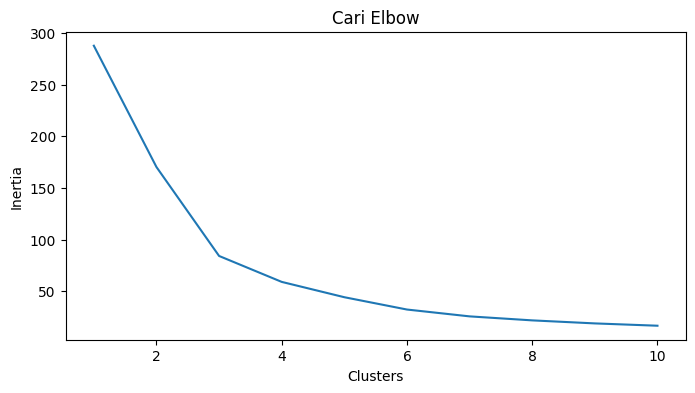

In [42]:
# Membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

C:\Users\My ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


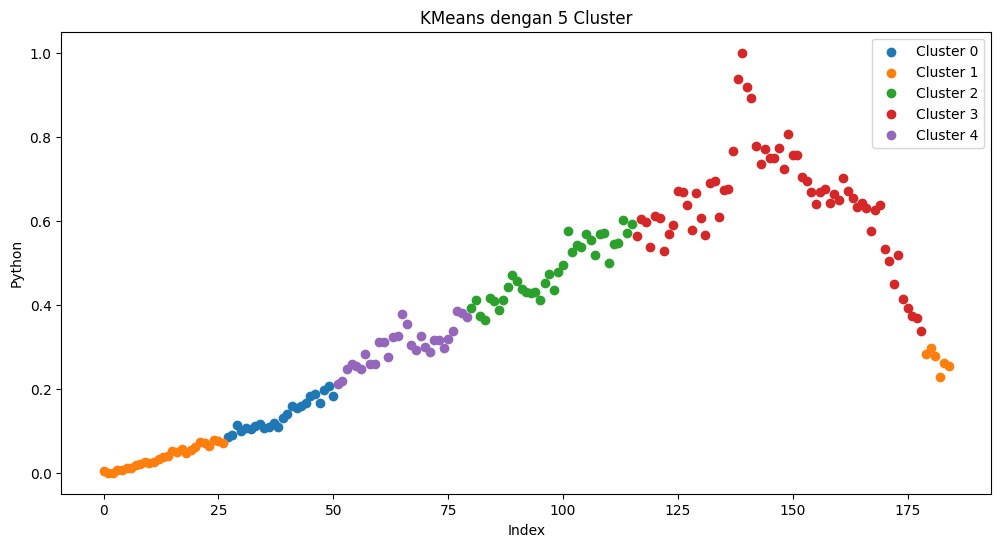

In [43]:
# Membuat objek KMeans dengan jumlah klaster yang sesuai
# Misalnya, jika elbow berada di 5 cluster
n_clusters = 5
km = KMeans(n_clusters=n_clusters).fit(data)

# Menambahkan kolom label pada dataset
data['Labels'] = km.labels_

# Membuat plot KMeans dengan klaster yang dipilih
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    plt.scatter(data[data['Labels'] == i].index, data[data['Labels'] == i]['Python'], label=f'Cluster {i}')
plt.title(f'KMeans dengan {n_clusters} Cluster')
plt.xlabel('Index')
plt.ylabel('Python')
plt.legend()
plt.show()
